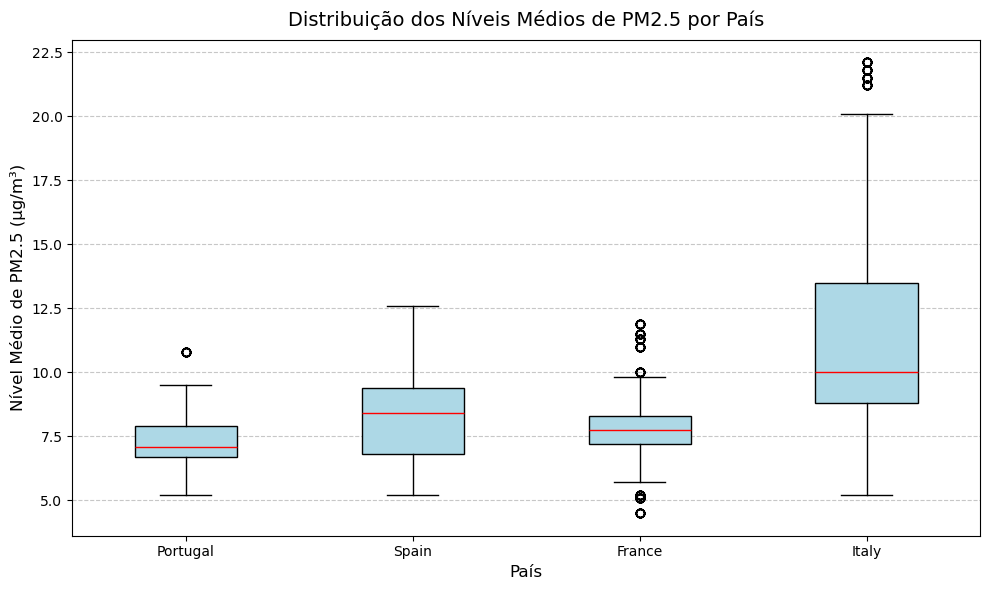


Estatísticas para Portugal:
  Média: 7.33 µg/m³
  Mediana: 7.10 µg/m³
  Mínimo: 5.20 µg/m³
  Máximo: 10.80 µg/m³
  Número de registros: 540

Estatísticas para Spain:
  Média: 8.32 µg/m³
  Mediana: 8.40 µg/m³
  Mínimo: 5.20 µg/m³
  Máximo: 12.60 µg/m³
  Número de registros: 1386

Estatísticas para France:
  Média: 7.79 µg/m³
  Mediana: 7.75 µg/m³
  Mínimo: 4.50 µg/m³
  Máximo: 11.90 µg/m³
  Número de registros: 2376

Estatísticas para Italy:
  Média: 11.38 µg/m³
  Mediana: 10.00 µg/m³
  Mínimo: 5.20 µg/m³
  Máximo: 22.10 µg/m³
  Número de registros: 2412


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Lendo o arquivo CSV
df = pd.read_csv(
    'AIRPOL_data.csv',           # Nome do arquivo
    delimiter=';',              # Separador do CSV
    header=0,                    # Usa a linha 9 (índice 8) como cabeçalho
    usecols=[0,1,2,3,4,5,6,7],  # Colunas a serem lidas
)
#print(df.to_string())

# Convertendo a coluna 'Air_Pollution_Average[ug/m3]' para numérico
countries = ['Portugal', 'Spain', 'France', 'Italy']
df['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(df['Air_Pollution_Average[ug/m3]'].str.replace(',', '.'), errors='coerce')
pm25_countries = df[(df['Country'].isin(countries)) & (df['Air_Pollutant'] == 'PM2.5')]
#print(pm25_countries.to_string())
data_to_plot = [pm25_countries[pm25_countries['Country'] == country]['Air_Pollution_Average[ug/m3]'] for country in countries]
#print(data_to_plot)
# Criando o boxplot
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.boxplot(data_to_plot, tick_labels=countries, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))

# Personalizando o gráfico
plt.title('Distribuição dos Níveis Médios de PM2.5 por País', fontsize=14, pad=10)
plt.xlabel('País', fontsize=12)
plt.ylabel('Nível Médio de PM2.5 (µg/m³)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grade no eixo y

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Exibindo estatísticas básicas para cada país
for country in countries:
    country_data = pm25_countries[pm25_countries['Country'] == country]['Air_Pollution_Average[ug/m3]']
    print(f"\nEstatísticas para {country}:")
    print(f"  Média: {country_data.mean():.2f} µg/m³")
    print(f"  Mediana: {country_data.median():.2f} µg/m³")
    print(f"  Mínimo: {country_data.min():.2f} µg/m³")
    print(f"  Máximo: {country_data.max():.2f} µg/m³")
    print(f"  Número de registros: {len(country_data)}")
